In [1]:
import sqlite3
import pandas as pd
connection = sqlite3.connect('recruit.db')
query = "select * from customer"
df_customer = pd.read_sql(query, connection)

In [2]:
trial_df = df_customer.loc[:,['state','race_code','travel_spending']]
travel_df = trial_df.groupby(['state','race_code']).agg({'travel_spending':'mean'})
travel_df = travel_df.reset_index()
filter_travel = travel_df[(travel_df.state=='CA')|(travel_df.state=='MA')|(travel_df.state=='NY')]

In [3]:
query = "select * from race"
df_race = pd.read_sql(query,connection)
df_race.columns = ['race_code','value']
travel_df_new = filter_travel.merge(df_race,on='race_code',how='right')
travel_df_new = travel_df_new.drop(['race_code'],axis=1)
travel_df_new.columns = ['state','avg_travel_spending','ethinicity']
travel_df_new.set_index(['state','ethinicity'],inplace=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000254EEE899B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000254F0FC3828>], dtype=object)

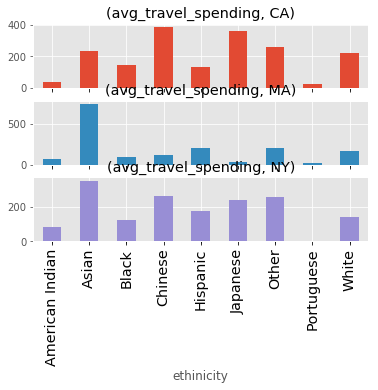

In [8]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.ion()
plt.rcParams['xtick.color']='k'
plt.rcParams['xtick.labelsize']='x-large'

travel_df_new.unstack(level=0).plot(kind='bar', subplots=True, legend=False)